# K-Means

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIForVet/aiml/blob/main/10-k-means.ipynb)

This notebook follows the content of the lesson on clustering, which demonstrates the k-means algorithm.

Execute the following code cell to load the libraries necessary for the work.

In [48]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

In [49]:
np.random.seed(7)

The next cell contains code that creates a dataset. It consists of 100 instances with two numerical attributes each. Execute it to create the dataset.

In [50]:
def create_data():
  X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.5, random_state=6)
  return X

X = create_data()

You can graphically display the created dataset by executing the next cell. The first attribute is shown along the x-axis, and the second attribute along the y-axis.

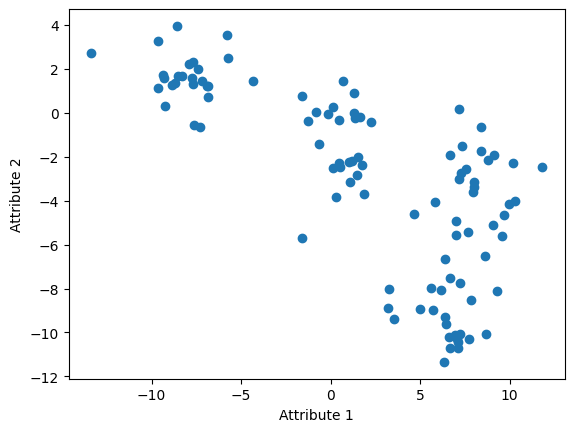

In [51]:
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')

plt.scatter(X[:, 0], X[:, 1])
plt.show()

The next cell contains settings that will be used henceforth: the number of clusters `k` and their colors.

In [52]:
k = 4
cluster_colors = ['orange', 'yellow', 'purple', 'green']

The function `calculate_distance` calculates the Euclidean distance between two points in a plane. It will be used later to calculate the distance between centroids and instances.

In [53]:
def calculate_distance(x1, x2):
  return np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2)

The function `generate_centroids` generates `k` random instances necessary for the initialization of the k-means algorithm.

In [54]:
def generate_centroids(X, k):
    N = X.shape[0]
    indices = np.random.randint(low=0, high=N, size=k)
    return X[indices]

In [55]:
centroids = generate_centroids(X, 4)

The function `show_centroids` allows us to see where the centroids are located in relation to the clusters.

In [56]:
def show_centroids(X, centroids, cluster_colors=cluster_colors):
  plt.xlabel('Attribute 1')
  plt.ylabel('Attribute 2')

  plt.scatter(X[:, 0], X[:, 1])

  for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], color=cluster_colors[i], marker='*')

  plt.show()

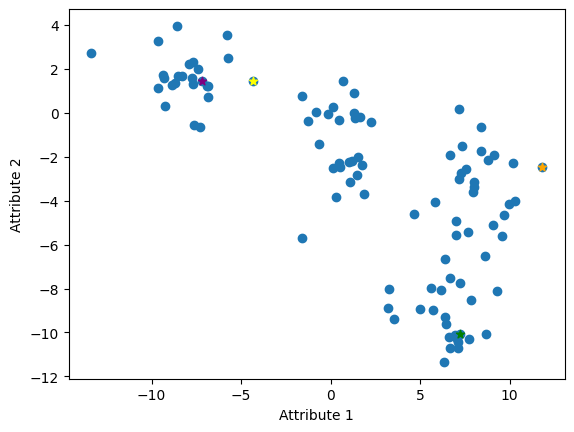

In [57]:
show_centroids(X, centroids)

The function `divide_data` divides instances into clusters. For each instance, it first calculates the distances to the centroids. Then, it identifies the centroid closest to the instance (the distance to that centroid is the smallest) and assigns the instance to the cluster determined by that centroid. To distinguish clusters, we will use the numbers 0, 1, 2, ..., k-1.

In [58]:
def divide_data(X, centroids, k):

  # initialize the list of cluster labels
  cluster_labels = []

  # iterate through the dataset instance by instance
  for x in X:

    # initialize the list of distances to centroids
    distances_to_centroids = []

    # then for each centroid ...
    for centroid in centroids:
      # ... calculate the distance between the instance and the centroid
      d = calculate_distance(x, centroid)

      # ... and add it to the list of distances
      distances_to_centroids.append(d)

    # when we have visited all centroids,
    # choose the centroid closest to the instance x
    label = np.argmin(distances_to_centroids)

    # conclude that the instance belongs to the cluster
    # determined by that centroid
    cluster_labels.append(label)

  # the result of the function is an array of cluster labels
  return np.array(cluster_labels)

In [59]:
cluster_labels = divide_data(X, centroids, k)

The next cell contains a function that calculates the number of instances per cluster. You can execute it and see the numerical distribution of the clusters.

In [60]:
def show_number_of_instances_per_cluster(k, cluster_labels, cluster_colors=cluster_colors):
  plt.bar(np.arange(0, k), np.bincount(cluster_labels), color=cluster_colors)
  plt.xticks(np.arange(0, k), np.arange(0, k))
  plt.show()

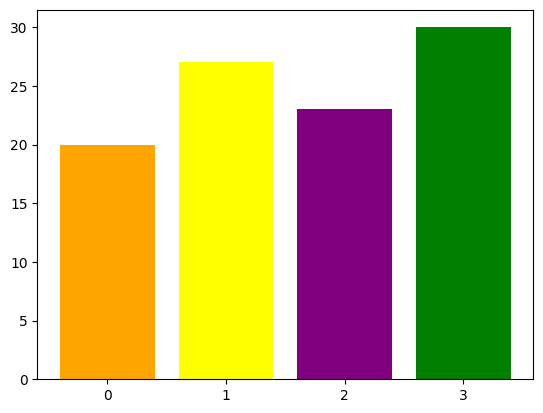

In [61]:
show_number_of_instances_per_cluster(k, cluster_labels)

Функција `show_clusters` приказује поделу података по кластерима. Центроиде кластера су због видљивости приказане као црне звездице.

In [62]:
def show_clusters(X, centroids, cluster_labels, cluster_colors=cluster_colors):
  plt.xlabel('Attribute 1')
  plt.ylabel('Attribute 2')

  for i, x in enumerate(X):
    instance_color = cluster_colors[cluster_labels[i]]
    plt.scatter(x[0], x[1], color=instance_color)

  for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], color='black', marker='*')

  plt.show()

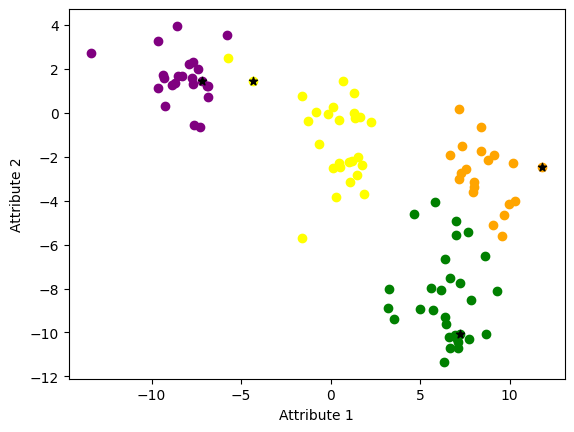

In [63]:
show_clusters(X, centroids, cluster_labels)

The function `calculate_new_centroids` updates the cluster centroids. It does this by averaging the values of all instances that belong to a cluster and declaring the resulting value as the new centroid.

In [64]:
def calculate_new_centroids(X, cluster_labels, k):

  # initialize the list of new centroids
  new_centroids = []

  # for each cluster
  for i in range(0, k):

    # ... extract the instances that belong to it
    instance_indices = cluster_labels == i
    instances_in_cluster = X[instance_indices]

    # then calculate the new centroid value
    # by averaging all instances in the cluster
    new_centroid = np.average(instances_in_cluster, axis=0)

    # add the calculated new centroid to the list of all centroids
    new_centroids.append(new_centroid)

  # the result of the function is an array of new centroids
  return np.array(new_centroids)

In [65]:
new_centroids = calculate_new_centroids(X, np.array(cluster_labels), k)

To verify where the new centroids are located, we will call the `show_centroids` function.

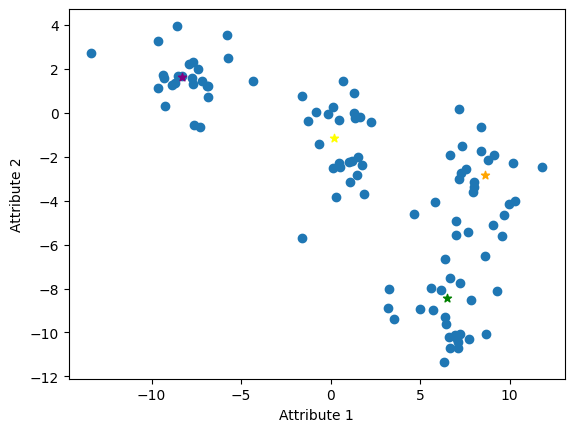

In [66]:
show_centroids(X, new_centroids)

The function `execute_clustering` combines all the steps we have gone through individually:
* generates initial centroids
* in iterations, it divides instances into clusters and then calculates new centroids.

In [67]:
def execute_clustering(X, k, epsilon=1e-4, max_iterations=300):

  # step of initializing centroids
  centroids = generate_centroids(X, k)

  # in each iteration of the loop
  for i in range(0, max_iterations):

    # step 1: dividing instances into clusters
    cluster_labels = divide_data(X, centroids, k)

    # step 2: calculating new centroids
    new_centroids = calculate_new_centroids(X, cluster_labels, k)

    # checking stopping criteria
    # if they are met, we stop the algorithm
    if np.linalg.norm(new_centroids - centroids) < epsilon:
      break
    # otherwise, we move to the next iteration
    centroids = new_centroids.copy()

  # the result of the function is the final cluster labels and centroid values
  return cluster_labels, new_centroids

In [68]:
final_cluster_labels, final_centroids = execute_clustering(X, k)

We can first check the numerical distribution of instances in the final clusters.

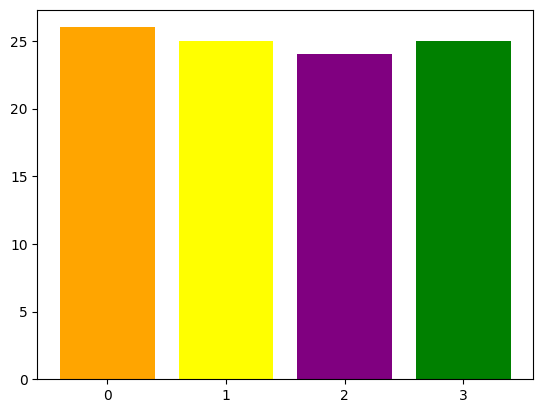

In [69]:
show_number_of_instances_per_cluster(k, final_cluster_labels)

Now let's show the final clusters.

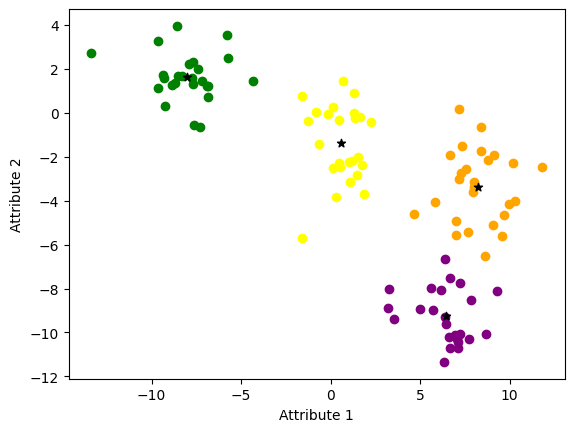

In [71]:
show_clusters(X, final_centroids, final_cluster_labels)

The following code block is used to display the animation of all the steps of dividing the dataset into clusters.

In [72]:
from IPython.display import display, clear_output

In [73]:
def show_animation(X, k):
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)

  # initialization
  num_iterations = 300
  epsilon = 1e-4

  # initial centroid values
  centroids = generate_centroids(X, k)

  # individual iterations
  for iteration in range(0, num_iterations):
    cluster_labels = divide_data(X, centroids, k)

    # display clusters
    ax.cla()
    ax.set_title('Iteration number: ' + str(iteration))

    for i, x in enumerate(X):
      instance_color = cluster_colors[cluster_labels[i]]
      ax.scatter(x[0], x[1], color=instance_color)

    for centroid in centroids:
      ax.scatter(centroid[0], centroid[1], color='black', marker='*')

    display(fig)
    clear_output(wait=True)
    # plt.pause(0.5)

    # calculate centroids for the next iteration
    new_centroids = calculate_new_centroids(X, cluster_labels, k)
    if np.linalg.norm(new_centroids - centroids) < epsilon:
      break

    centroids = new_centroids.copy()

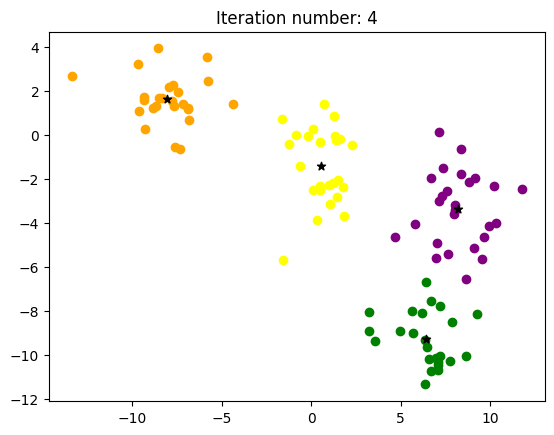

In [74]:
show_animation(X, k)